## Estimation of Price Elasticity of Chocolate based on official statistical data sets from Germany

#### Demand from monthly report (Monatsbericht) where volume of sales (Umsatz) is listed
#### Supply form monthly production report (monatliche Produktionserhebung) in tons or kg of produce with designated prices for each
#### Costs could be taken from producer prices and import prices as well as underlying trend in prices from chocolate futures

In [1]:
# loading libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [2]:
# loading destatis data
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path)
index_list = pd.read_csv('../data/processed/index_list_combined_data.csv', names=['Datum'])
index_list.drop(index_list.index[0], inplace=True)
df.index = index_list['Datum']
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# dropping first column which is just the date
#df = df.iloc[:, 1:]
                # for usage of column numbers in baseline model this is needed

df

,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_ Sonstige Nahrungsmittel (ohne Getränke),ErzPr_ Süßwaren (ohne Dauerbackwaren),ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee, entkoffeiniert oder geröstet","ErzPr_ Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_ Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_ Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_ Sonstige Nahrungsmittel (ohne Getränke),EinfPr_ Süßwaren (ohne Dauerbackwaren),"EinfPr_ Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_ Nahrungsmittel,"VPI_ Zucker, Marmelade, Honig und andere Süßwaren",VPI_ Schokoladen,VPI_ Süßwaren,VPI_ Alkoholfreie Getränke,"VPI_ Kaffee, Tee und Kakao",VPI_ Kaffee und Ähnliches,VPI_ Tee und teeähnliche Erzeugnisse,VPI_ Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Klei

In [6]:
df.iloc[:, 45], df.iloc[:, 122]

(Datum
 2019-01-31    6.619170e+08
 2019-02-28    7.964770e+08
 2019-03-31    8.120600e+08
 2019-04-30    6.919610e+08
 2019-05-31    6.131040e+08
                   ...     
 2025-08-31    1.183673e+09
 2025-09-30    1.493582e+09
 2025-10-31    1.573384e+09
 2025-11-30    1.413867e+09
 2025-12-31             NaN
 Name: Umsatz_WZ08-1082, Length: 84, dtype: float64,
 Datum
 2019-01-31    461306000.0
 2019-02-28    472576000.0
 2019-03-31    500789000.0
 2019-04-30    365671000.0
 2019-05-31    379340000.0
                  ...     
 2025-08-31    740334000.0
 2025-09-30    951864000.0
 2025-10-31    941120000.0
 2025-11-30    874262000.0
 2025-12-31            NaN
 Name: Wert der zum Absatz bestimmten Produktion_Schokolade u.a. kakaohaltige Lebensmittelzubereit., Length: 84, dtype: float64)

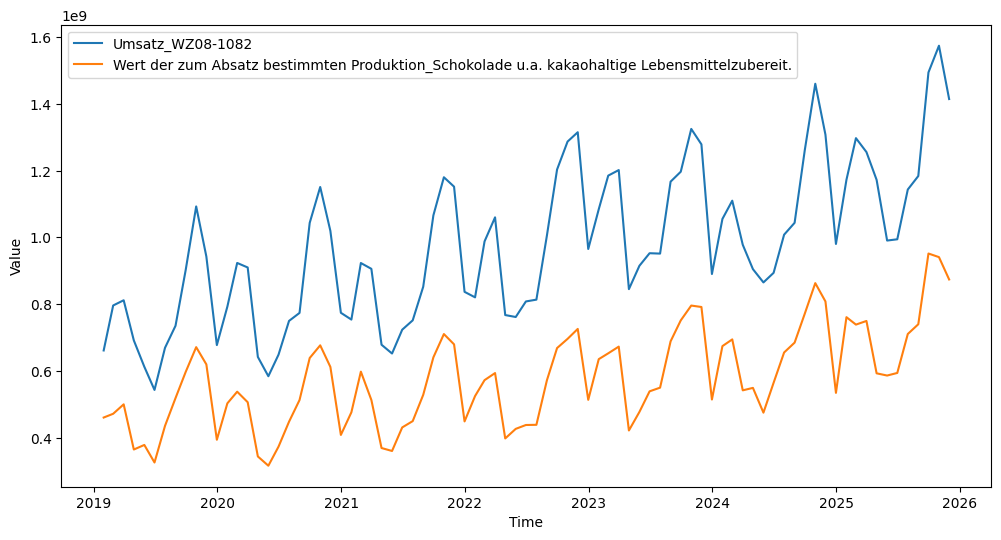

In [7]:
# Defining demand and price::
demand = (df.iloc[:, 45])
price = df.iloc[:, 122]

# Plotting demand and price
plt.figure(figsize=(12, 6))
plt.plot(demand, label=df.iloc[:, 45].name)
plt.plot(price, label=df.iloc[:, 122].name)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

C:\Users\jmerg\AppData\Local\Temp\ipykernel_70992\3636259724.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  demand_change = demand.pct_change()
C:\Users\jmerg\AppData\Local\Temp\ipykernel_70992\3636259724.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_change = price.pct_change()


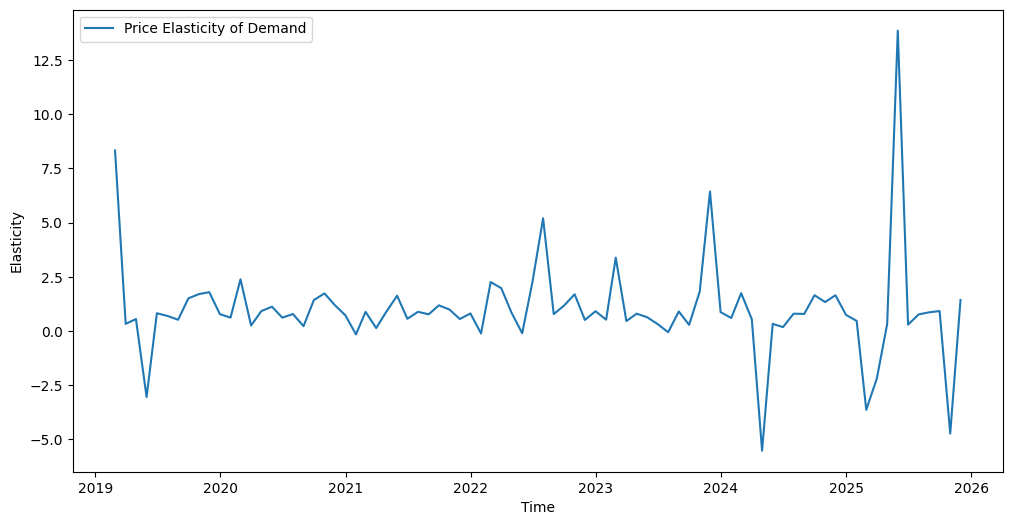

In [8]:
# Estimating price elasticity of demand
# Calculating percentage change in demand and price
demand_change = demand.pct_change()
price_change = price.pct_change()

# Calculating price elasticity of demand
elasticity = demand_change / price_change

# Plotting elasticity over time
plt.figure(figsize=(12, 6))
plt.plot(elasticity, label='Price Elasticity of Demand')
plt.xlabel('Time')
plt.ylabel('Elasticity')
plt.legend()
plt.show()

In [9]:
print(elasticity.describe())
elasticity

count    82.000000
mean      0.997927
std       2.277387
min      -5.523349
25%       0.474188
50%       0.790257
75%       1.399358
max      13.844914
dtype: float64


Datum
2019-01-31         NaN
2019-02-28    8.321040
2019-03-31    0.327718
2019-04-30    0.548142
2019-05-31   -3.048684
                ...   
2025-08-31    0.861298
2025-09-30    0.916343
2025-10-31   -4.733622
2025-11-30    1.427131
2025-12-31         NaN
Length: 84, dtype: float64

#### Finding 1: 
Very dynamic price elasticity of chocolates over time with very high 13.845 and very low -5.523 values

Interpretierbarkeit: <br> 
Elastische Nachfrage (\(|\epsilon |>1\)): <br> 
    Eine prozentuale Preisänderung führt zu einer stärkeren prozentualen Änderung der Produktionsmenge. Eine Preiserhöhung senkt den Umsatz, eine Preissenkung steigert ihn. <br> 
Unelastische Nachfrage (\(|\epsilon |<1\)): <br> 
    Eine Preisänderung führt zu einer schwächeren Änderung der Menge. Eine Preiserhöhung steigert den Umsatz, da der Mengenrückgang geringer ist als der Preisanstieg. <br> 
Isoelastisch/Proportional (\(|\epsilon |=1\)): <br> 
    Eine Preisänderung führt zu einer gleich großen Mengenänderung, der Umsatz bleibt konstant<br>
Vollkommen unelastische (\(|\epsilon |=0\)): <br> 
    Die Nachfrage bleibt trotz Preisänderungen gleich

#### Finding 2:
With question "Wie hoch darf Preis gesteigert werden, damit Kunden nicht übermäßig weniger kaufen?"<br> 
an unelastic price elasticity is required. <br> 
Thus turning point estimation necessary, so that an isoelastic price elasticity is at least maintained.

### Plots of interesting variables for chocolate demand estimation

In [10]:
# defining  household consumption and producer price
household_consumption = df.iloc[:, 93]
producer_price = df.iloc[:, 78]

# using the first entry of time series to make indexes comparable
household_consumption = household_consumption / household_consumption.iloc[0] *10
producer_price = producer_price / producer_price.iloc[0] *10
demand = demand / demand.iloc[0] *10
price = price / price.iloc[0] *10

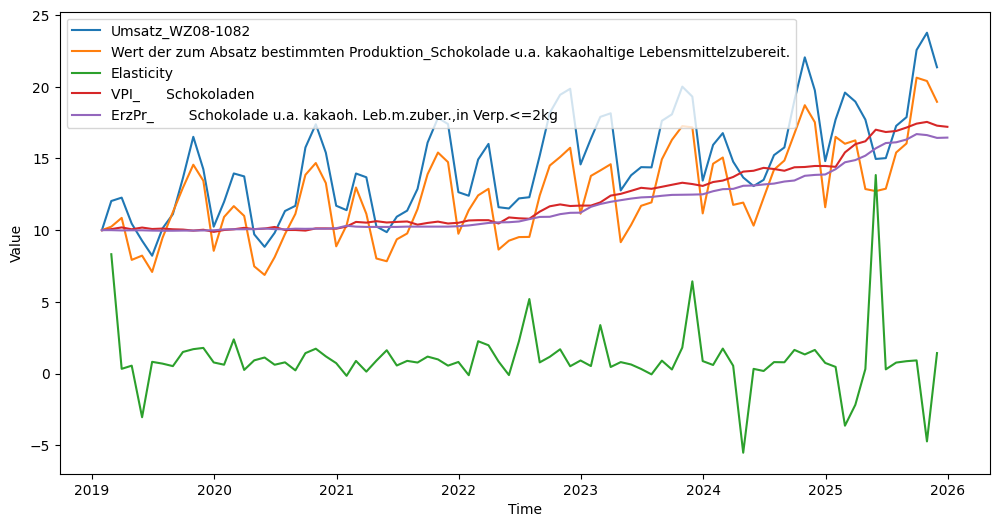

In [11]:
# plotting demand, price, elasticity, household consumption, producer price
plt.figure(figsize=(12, 6))
plt.plot(demand, label=df.iloc[:, 45].name)
plt.plot(price, label=df.iloc[:, 122].name)
plt.plot(elasticity, label='Elasticity')
plt.plot(household_consumption, label=df.iloc[:, 93].name)
plt.plot(producer_price, label=df.iloc[:, 78].name)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Plotting the available time series against elasticity

In [12]:
# more variables to consider:
income_exmpl = df.iloc[:, 25]
income_exmpl = income_exmpl / income_exmpl.iloc[0] *10
import_choc = df.iloc[:, 88]
import_choc = import_choc / import_choc.iloc[0] *10
production_weight = df.iloc[:, 126]
production_weight = production_weight / production_weight.iloc[0] *10
production_pieces = df.iloc[:, 128]
production_pieces = production_pieces / production_pieces.iloc[0] *10
coffee_demand = df.iloc[:, 144]
coffee_demand = coffee_demand / coffee_demand.iloc[0] *10
shares = df.iloc[:, [166, 167, 168, 169, 170]]
shares = shares / shares.iloc[0] *10

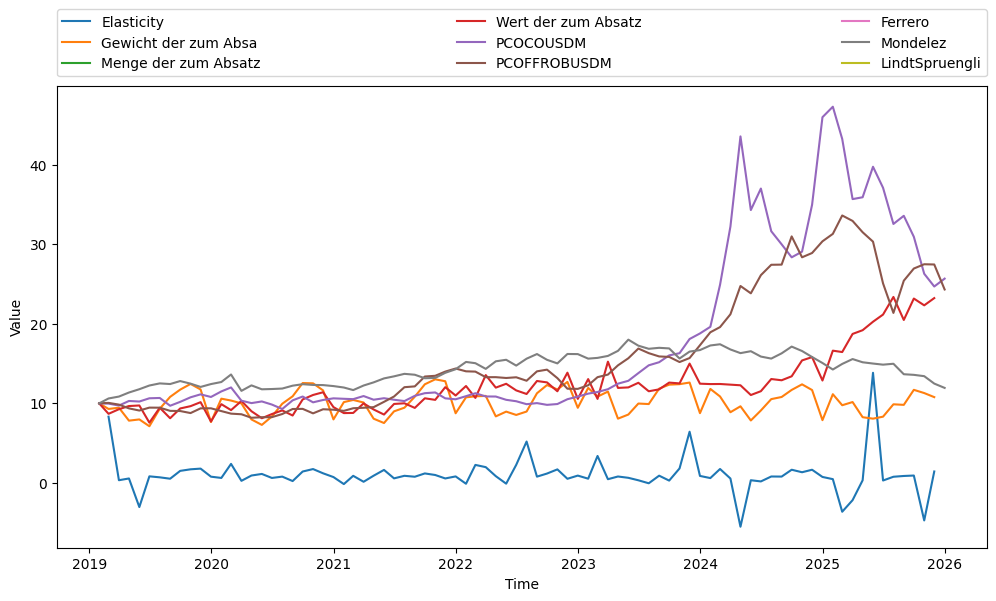

In [13]:
# plotting all variables together
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.figure(figsize=(12, 6))
#plt.plot(demand, label=df.iloc[:, 45].name)
#plt.plot(price, label=df.iloc[:, 122].name[:20])
plt.plot(elasticity, label='Elasticity')
#plt.plot(household_consumption, label=df.iloc[:, 93].name[:20])
#plt.plot(producer_price, label=df.iloc[:, 78].name[:20])
plt.plot(production_weight, label=df.iloc[:, 126].name[:20])
plt.plot(production_pieces, label=df.iloc[:, 128].name[:20])
plt.plot(coffee_demand, label=df.iloc[:, 144].name[:20])
plt.plot(shares.iloc[:, 0], label=df.iloc[:, 166].name[:20])
plt.plot(shares.iloc[:, 1], label=df.iloc[:, 167].name[:20])
plt.plot(shares.iloc[:, 2], label=df.iloc[:, 168].name[:20])
plt.plot(shares.iloc[:, 3], label=df.iloc[:, 169].name[:20])
plt.plot(shares.iloc[:, 4], label=df.iloc[:, 170].name[:20])
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=3, mode="expand", borderaxespad=0.)
#mpl.style.use('Qualitative',['tab20b'])
plt.show()

In [12]:
# interactive plot of all variables together
import plotly.express as px
fig = px.line(df, x=df.index, y=[demand, price, elasticity, household_consumption, producer_price, production_weight, production_pieces, coffee_demand, shares.iloc[:, 0], shares.iloc[:, 1], shares.iloc[:, 2], shares.iloc[:, 3], shares.iloc[:, 4]], labels={'value': 'Value', 'variable': 'Variable'})
fig.update_layout(title='Time Series of Variables', xaxis_title='Time', yaxis_title='Value')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed